In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn import preprocessing
from itertools import combinations
from scipy.stats import chi2_contingency
import warnings
import pandas as pd
import missingno as msno
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


In [2]:
#importing dataset
data = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
data_copy = data.copy()

In [3]:
data_copy.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
print("data.shape : {}".format(data_copy.shape))

data.shape : (32581, 12)


# Meaning of all data fields
* loan_status: the target variable, contain binary value 0 or 1, 0-not default, 1-default -> categorical
* person_age: customer's age -> numerical
* person_imcome: anual imcome -> numerical
* person_home_ownership: 
* person_emp_length: number of employment -> numerical
* loan_intent: purpose of loan -> categorical
* loan_amnt: amount of loan -> numerical
* loan_grade: grade of loan -> categorical
* loan_int_rate: interest rate -> numerical
* loan_percent_income: ratio of amount of loan and anual income -> numerical
* cb_person_default_on_file: history of default? yes or no -> categorical
* cb_person_cred_hist_length: number of year open crdit -> numerical

# Check duplicate

In [5]:
data_copy.duplicated(keep=False).sum()

330

# Check missing value

<AxesSubplot:>

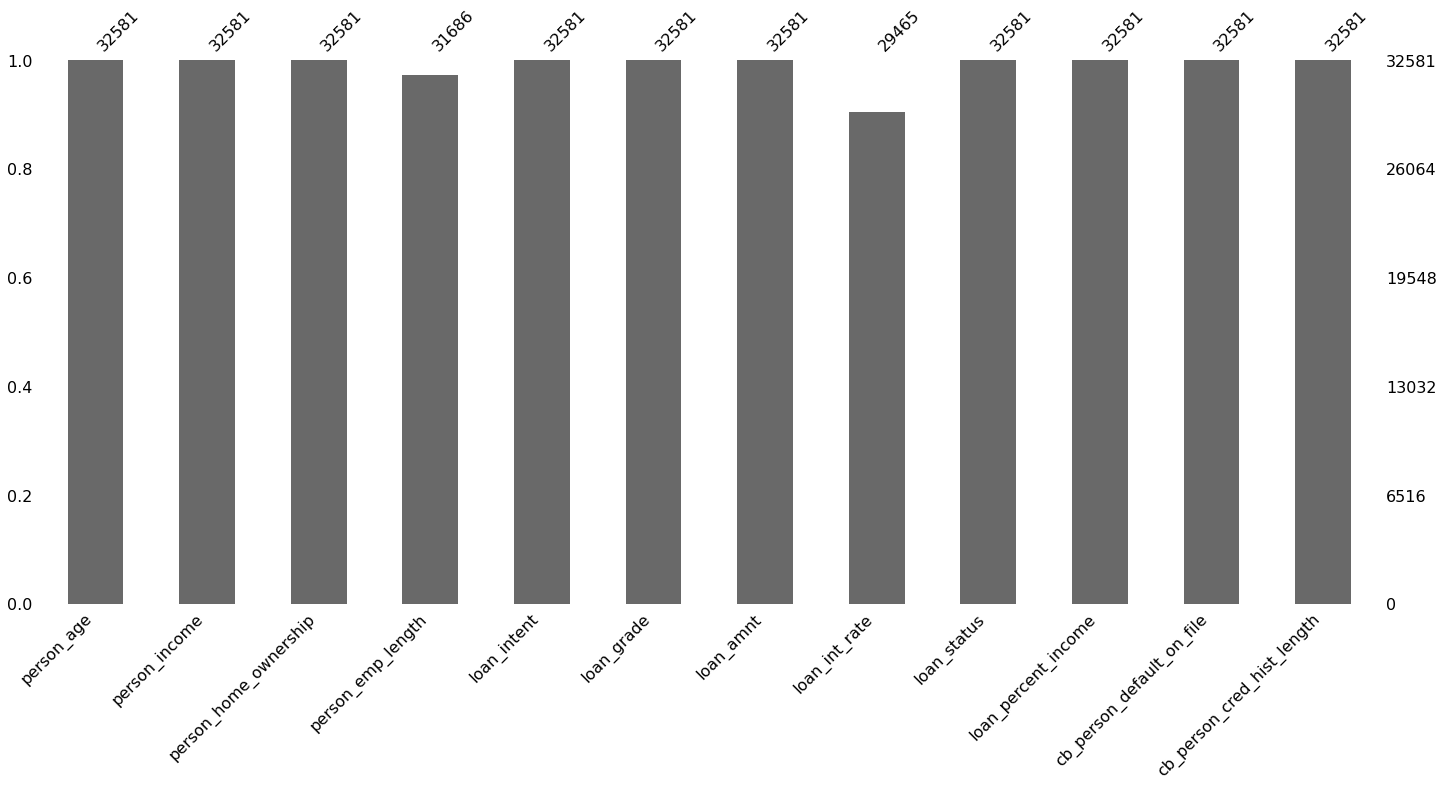

In [6]:
msno.bar(data_copy)

In [7]:
(data_copy.isnull().sum()/len(data_copy))*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

* columns have missing value: 'person_emp_length', 'loan_int_rate'
* missing value < 30%

### Types of Data

**target variable is loan_status column**

In [8]:
data_copy["loan_status"].head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [9]:
data_copy["loan_status"].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

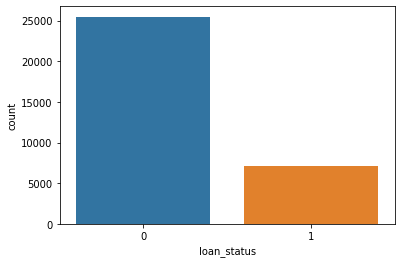

In [10]:
sns.countplot(data_copy["loan_status"])

In [11]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
data_copy.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [13]:
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical = ['person_home_ownership', 'loan_intent','loan_grade','loan_status','cb_person_default_on_file']

# Summary of numerical data

In [14]:
data_copy.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


* person_emp_length, loan_int_rate have count < 32581 -> missing value
* person_age, person_income, person_emp_lengt have maximum value is quite far from 75th percentile value -> seem skewness.

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

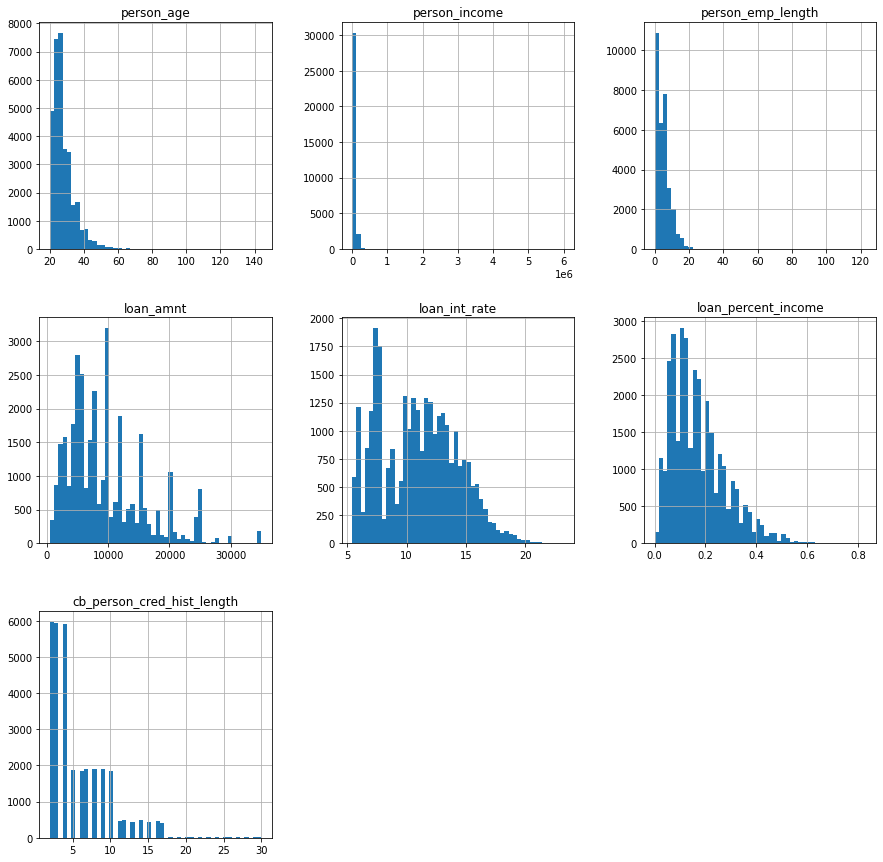

In [15]:
data[numerical].hist(figsize=(15,15), bins=50)

**Examining each variable**

In [16]:
def descriptive_summary_n(data, column_name):
    fig, axs = plt.subplots(1,2, figsize=(19,6))
    axs[0].hist(data[column_name], bins=50) 
    axs[0].axvline(data[column_name].mean(), color='red', label=f"Mean: {round(data[column_name].mean(),2)}") 
    axs[0].axvline(data[column_name].median(), color='green', label=f"Median: {round(data[column_name].median(),2)}") 
    axs[0].axvline(x=data[column_name].describe()[4],color='r', linestyle='--', label=f"25th percentile: {data[column_name].describe()[4]}") 
    axs[0].axvline(x=data[column_name].describe()[6],color='r', linestyle='--', label=f"75th percentile: {data[column_name].describe()[6]}") 
    axs[0].legend()
    sns.boxplot(data=data, x=column_name, ax=axs[1]) #creating boxplot
    axs[1].axvline(data[column_name].mean(), color='red') #vertical line for the mean of the distribution
    fig.suptitle(f"Histogram and Boxplot of {column_name}")
    plt.show()
    
    print(f"{data[column_name].describe().round(3)}\n")
    print(f"Skewness: {skew(data[data[column_name].isna()==False][column_name], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[data[column_name].isna()==False][column_name], bias=True)}")

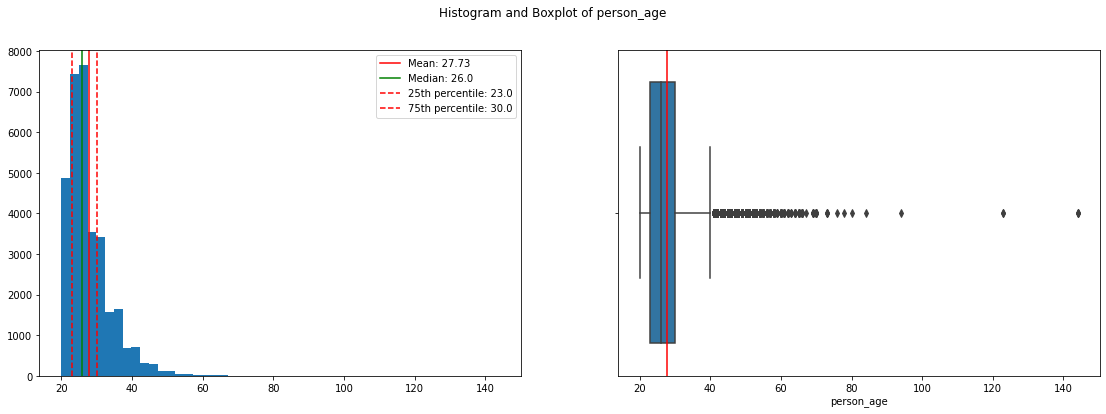

count    32581.000
mean        27.735
std          6.348
min         20.000
25%         23.000
50%         26.000
75%         30.000
max        144.000
Name: person_age, dtype: float64

Skewness: 2.5812736796698657
Kurtosis: 18.557792324565625


In [17]:
descriptive_summary_n(data_copy, numerical[0])

age is mostly distributed between 23 and 30. data distribution is right-skewed, few value > 100,
may be outliers. -> clip

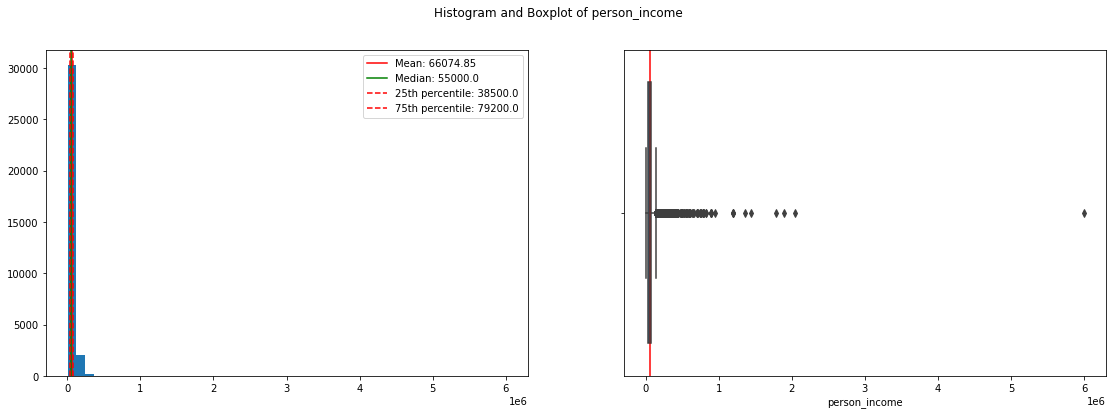

count      32581.000
mean       66074.848
std        61983.119
min         4000.000
25%        38500.000
50%        55000.000
75%        79200.000
max      6000000.000
Name: person_income, dtype: float64

Skewness: 32.86383572338852
Kurtosis: 2692.8592897449143


In [18]:
descriptive_summary_n(data_copy, numerical[1])

"person_income" distributed between 38500 and 79200, data distribution is heavily right skewd, and lots of outliers. -> clip

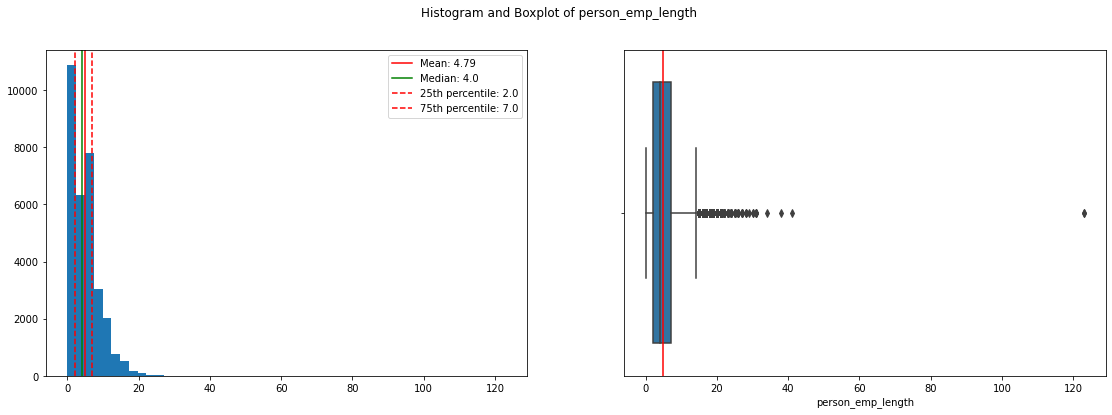

count    31686.000
mean         4.790
std          4.143
min          0.000
25%          2.000
50%          4.000
75%          7.000
max        123.000
Name: person_emp_length, dtype: float64

Skewness: 2.6143313527840095
Kurtosis: 43.71524985460213


In [19]:
descriptive_summary_n(data_copy, numerical[2])

"person_emp_length" is right skewed and long tailed with potential outliers. It is mostly distributed between 2 and 7. Max number is 123, 123 years of employment length seems very strange, this observation is potentially an error.-> clip

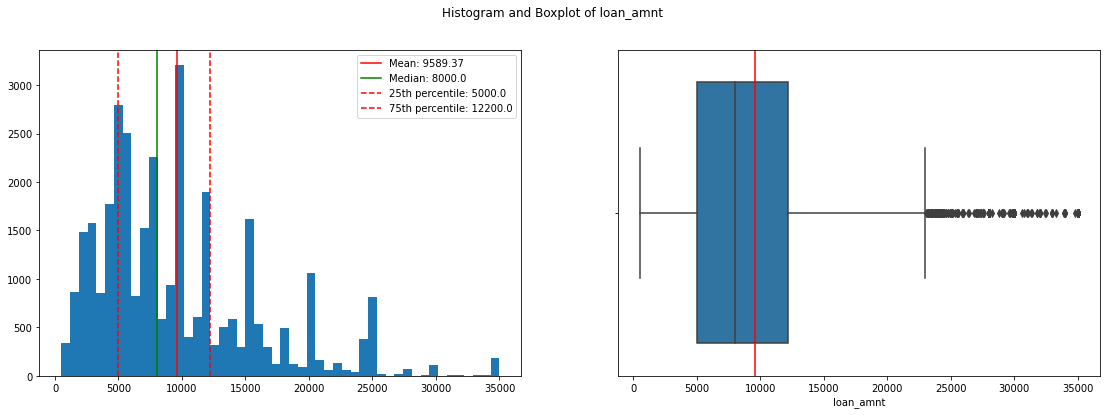

count    32581.000
mean      9589.371
std       6322.087
min        500.000
25%       5000.000
50%       8000.000
75%      12200.000
max      35000.000
Name: loan_amnt, dtype: float64

Skewness: 1.192422526473502
Kurtosis: 1.4231627003417104


In [20]:
descriptive_summary_n(data_copy, numerical[3])

"loan_amnt" variable is slightly right skewed.

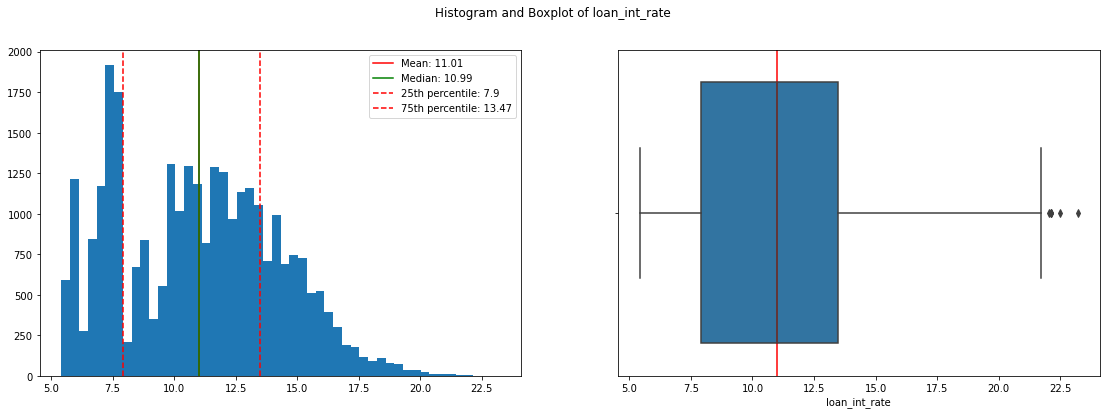

count    29465.000
mean        11.012
std          3.240
min          5.420
25%          7.900
50%         10.990
75%         13.470
max         23.220
Name: loan_int_rate, dtype: float64

Skewness: 0.2085396846918691
Kurtosis: -0.6716987706450692


In [21]:
descriptive_summary_n(data_copy, numerical[4])

"loan_int_rate" variable's skewness is 0.20, very close to normal distribution. Data is lighter tailed than normal distribution. Mean and Median very close to each other. 

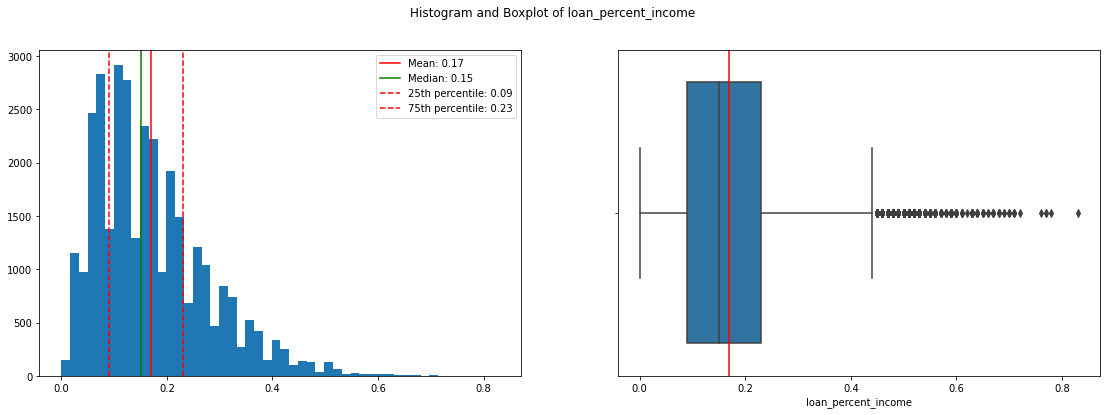

count    32581.000
mean         0.170
std          0.107
min          0.000
25%          0.090
50%          0.150
75%          0.230
max          0.830
Name: loan_percent_income, dtype: float64

Skewness: 1.0646196197529139
Kurtosis: 1.2233147441419057


In [22]:
descriptive_summary_n(data_copy, numerical[5])

"loan_percent_income" variable is right skewed and lightly tailed. 

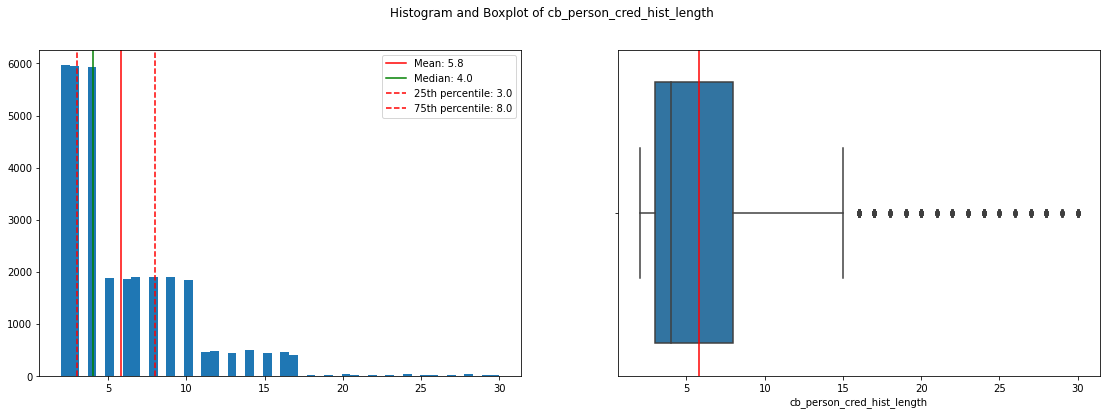

count    32581.000
mean         5.804
std          4.055
min          2.000
25%          3.000
50%          4.000
75%          8.000
max         30.000
Name: cb_person_cred_hist_length, dtype: float64

Skewness: 1.6617136116084419
Kurtosis: 3.715439392280821


In [23]:
descriptive_summary_n(data_copy, numerical[6])

Mostly distributed between 3 and 8. "cb_person_cred_hist_length" variable is slightly right skewd. 

# Summary of categorical data

In [24]:
data_c = data.copy()
data_c.loc[data_c['loan_status']==0, 'loan_status']='Not default'
data_c.loc[data_c['loan_status']==1, 'loan_status']='Default'

In [25]:
def descriptive_summary_c(data, column_name):
    print(f"\033[1mFrequency table of {column_name} variable: \033[0m")
    freq_table = data[column_name].value_counts().to_frame().reset_index() 
    freq_table.columns = [column_name, 'Frequencies']
    freq_table['% Percentages'] = round(freq_table['Frequencies']/data[column_name].count()*100,2) 
    display(freq_table)
    print()
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(data=freq_table, x='Frequencies', y=column_name, palette='flare', ax=axs[0]) 
    colors = sns.color_palette('flare')
    d = list(freq_table['% Percentages'])
    labels = list(freq_table[column_name])
    plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%')
    fig.suptitle(f"Bar Chart and Pie Chart of {column_name} variable")
    plt.show()

Frequency table of person_home_ownership variable: 


,person_home_ownership,Frequencies,% Percentages
0,RENT,16446,50.48
1,MORTGAGE,13444,41.26
2,OWN,2584,7.93
3,OTHER,107,0.33


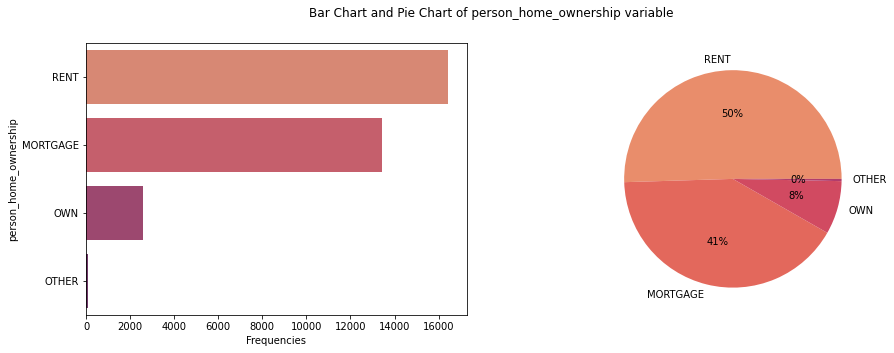

In [26]:
descriptive_summary_c(data_c, categorical[0])

The large proportion of the person_home_ownership variable is Rent and Mortage.

Frequency table of loan_intent variable: 


,loan_intent,Frequencies,% Percentages
0,EDUCATION,6453,19.81
1,MEDICAL,6071,18.63
2,VENTURE,5719,17.55
3,PERSONAL,5521,16.95
4,DEBTCONSOLIDATION,5212,16.00
5,HOMEIMPROVEMENT,3605,11.06


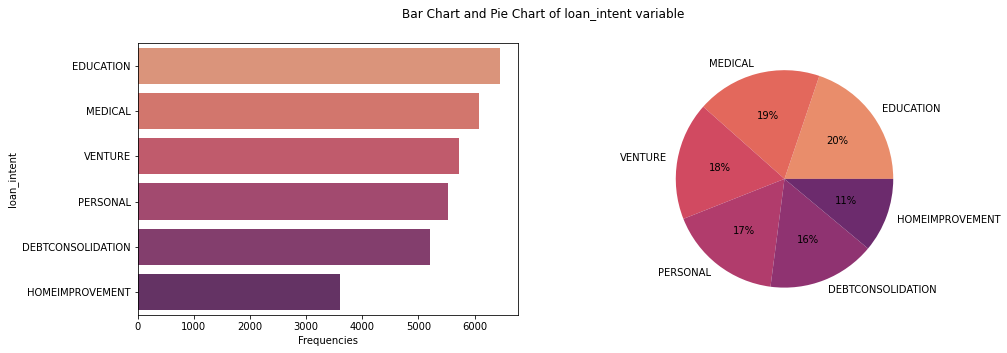

In [27]:
descriptive_summary_c(data_c, categorical[1])

data is distributed in approximately the same proportion. 

Frequency table of loan_grade variable: 


,loan_grade,Frequencies,% Percentages
0,A,10777,33.08
1,B,10451,32.08
2,C,6458,19.82
3,D,3626,11.13
4,E,964,2.96
5,F,241,0.74
6,G,64,0.20


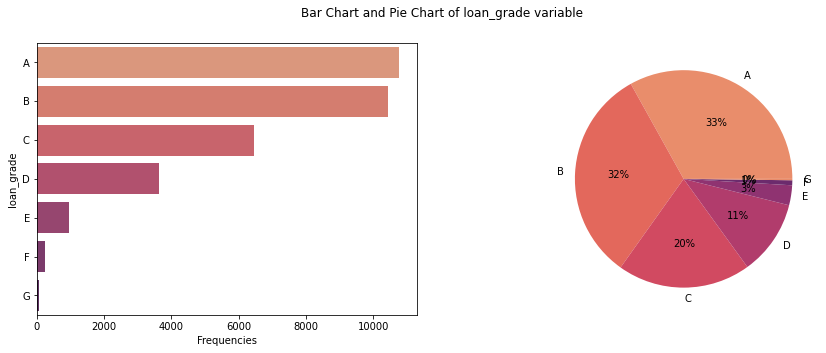

In [28]:
descriptive_summary_c(data_c, categorical[2])

Most of the "loan_grade" variable data distributed in of "A", "B", "C", and "D" category. 

Frequency table of loan_status variable: 


,loan_status,Frequencies,% Percentages
0,Not default,25473,78.18
1,Default,7108,21.82


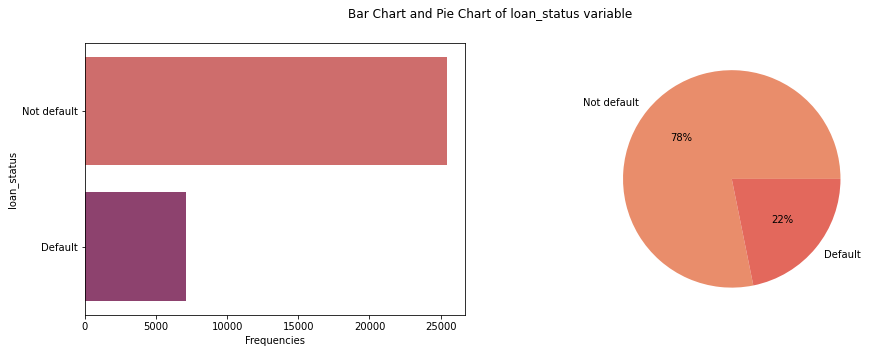

In [29]:
descriptive_summary_c(data_c, categorical[3])

Great percentage of loan_status variable is "Not Default" category.

Frequency table of cb_person_default_on_file variable: 


,cb_person_default_on_file,Frequencies,% Percentages
0,N,26836,82.37
1,Y,5745,17.63


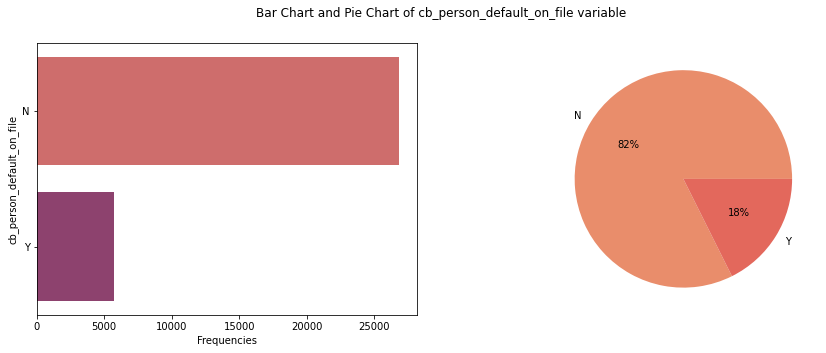

In [30]:
descriptive_summary_c(data_c, categorical[4])

"cb_person_default_on_file" is 82% "N" category. 

### Correlation among categorical data
using cramers'v measure

In [31]:
label = preprocessing.LabelEncoder() 
data_encoded = pd.DataFrame() 

for i in data_copy[categorical].columns :
    data_encoded[i]=label.fit_transform(data_copy[i])

In [32]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [33]:
rows= []
for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)      
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
person_home_ownership,1.00,0.01,0.01,0.06,0.00
loan_intent,0.01,1.00,0.00,0.02,0.00
loan_grade,0.01,0.00,1.00,0.17,0.40
loan_status,0.06,0.02,0.17,1.00,0.03
cb_person_default_on_file,0.00,0.00,0.40,0.03,1.00


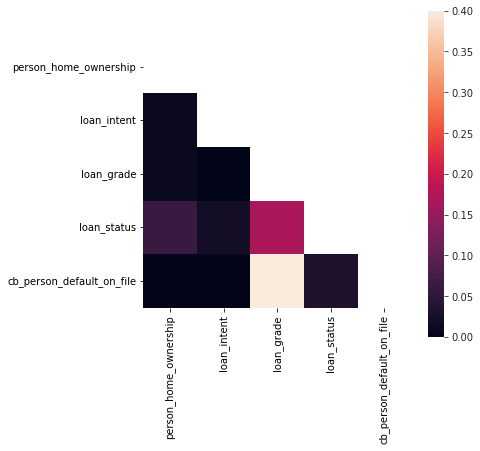

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask, square=True)
plt.show()

loan_status and loan_grade, loan_grade and cb_person_default_on_file variables have some correlations between them.

# Correlation among numerical data

**using pearson measure**

In [35]:
data_copy[numerical+["loan_status"]].corr(method='pearson')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.042411,0.859133,-0.021629
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.254471,0.117987,-0.144449
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.054111,0.144699,-0.082489
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.572612,0.041967,0.105376
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.120314,0.016696,0.335133
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,1.000000,-0.031690,0.379366
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.031690,1.000000,-0.015529
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,0.379366,-0.015529,1.000000


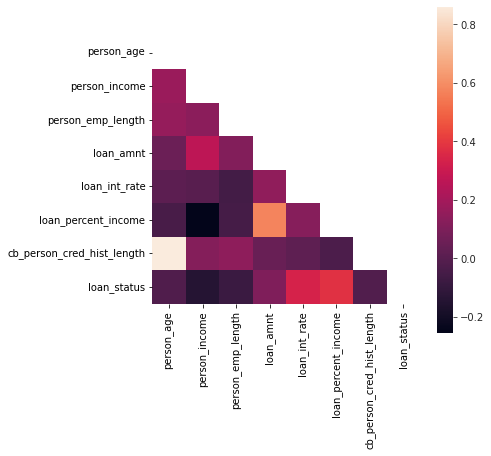

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(data[numerical+["loan_status"]].corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data[numerical+["loan_status"]].corr(method='pearson'), mask=mask, square=True)
plt.show()

* person_age and cb_person_cred_hist_length is positively strong correlated. 
* loan_percent_income is correlated loan_amnt and person_income,  
* person_income is positively correlated with loan_amnt

# Weight of evidence - IV

**drop duplicate, impute missing data**

In [37]:
data_cop = data.copy()
# drop duplicate

data_cop = data_cop.drop_duplicates()
data_cop.reset_index(drop=True, inplace=True)
#impute
columns_num = data_cop.select_dtypes(['float', 'int']).columns
data_cop[columns_num] = data_cop[columns_num].apply(lambda x: x.fillna(x.median()), axis=0)

columns_obj = data_cop.select_dtypes(['object']).columns
data_cop[columns_obj] = data_cop[columns_obj].apply(lambda x: x.fillna('Missing'), axis=0)



In [38]:
def calculate_woe_iv(data, col, target, bins=10):
    if (data[col].dtype.kind in 'bifc') and (len(np.unique(data[col]))>10):
        bin_df = pd.qcut(data[col], bins,  duplicates='drop')
        d0 = pd.DataFrame({'bin range': bin_df, 'y': data[target]})
    else:
        d0 = pd.DataFrame({'bin range': data[col], 'y': data[target]})

    d = d0.groupby("bin range", as_index=False).agg({"y": ["count", "sum"]})
    d.columns = ['bin range', 'num of data', 'Events']

    d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()# avoid 0

    d['Non-Events'] = d['num of data'] - d['Events']

    d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()#avoid 0

    d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
    d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
    d.insert(loc=0, column='col name', value=col)

    return d

calculate_woe_iv(data_cop, "loan_int_rate", "loan_status")

,col name,bin range,num of data,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,loan_int_rate,"(5.419, 6.92]",3375,272,0.038369,3103,0.122517,-1.160996,0.097696
1,loan_int_rate,"(6.92, 7.75]",3127,305,0.043024,2822,0.111423,-0.951563,0.065085
2,loan_int_rate,"(7.75, 9.32]",3263,398,0.056143,2865,0.113120,-0.700545,0.039915
3,loan_int_rate,"(9.32, 10.62]",3410,549,0.077444,2861,0.112962,-0.377501,0.013408
4,loan_int_rate,"(10.62, 10.99]",4745,915,0.129073,3830,0.151222,-0.158369,0.003508
5,loan_int_rate,"(10.99, 11.49]",1761,288,0.040626,1473,0.058159,-0.358769,0.006290
6,loan_int_rate,"(11.49, 12.68]",3088,575,0.081112,2513,0.099222,-0.201536,0.003650
7,loan_int_rate,"(12.68, 13.61]",3241,687,0.096911,2554,0.100841,-0.039755,0.000156
8,loan_int_rate,"(13.61, 15.23]",3288,1237,0.174496,2051,0.080981,0.767688,0.071790
9,loan_int_rate,"(15.23, 23.22]",3118,1863,0.262802,1255,0.049552,1.668379,0.355781


In [39]:
def rank_iv(iv):
    if iv <= 0.02:
        return 'Useless'
    elif iv <= 0.1:
        return 'Weak'
    elif iv <= 0.3:
        return 'Medium'
    elif iv <= 0.5:
        return 'Strong'
    else:
        return 'suspicious'
target = "loan_status"
cols_expt_target = list(data.columns.drop(target))
IV = []
for col in cols_expt_target:
    IV.append(calculate_woe_iv(data_cop, col, target)["IV"].sum())

res = pd.DataFrame(list(zip(cols_expt_target, IV)), columns=["col name", "IV"])
res["rank"] = res["IV"].apply(rank_iv)
res.sort_values("IV")

,col name,IV,rank
10,cb_person_cred_hist_length,0.004207,Useless
0,person_age,0.010719,Useless
3,person_emp_length,0.060641,Weak
6,loan_amnt,0.085864,Weak
4,loan_intent,0.095977,Weak
9,cb_person_default_on_file,0.164265,Medium
2,person_home_ownership,0.375582,Strong
1,person_income,0.469830,Strong
7,loan_int_rate,0.657280,suspicious
8,loan_percent_income,0.872763,suspicious
